<div class="alert alert-block alert-success">
    
# EDA Projects: S&P Stock 500 Prices 2014-2017
    
 👨‍🏫 **David Wood**      
 📅 **[07-Apr-2023]**  
 

</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-Projects:-S&amp;P-Stock-500-Prices-2014-2017" data-toc-modified-id="EDA-Projects:-S&amp;P-Stock-500-Prices-2014-2017-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA Projects: S&amp;P Stock 500 Prices 2014-2017</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Import-modules-and-data-👨‍💻" data-toc-modified-id="Import-modules-and-data-👨‍💻-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import modules and data 👨‍💻</a></span></li><li><span><a href="#Data-Inspection-🔍📊" data-toc-modified-id="Data-Inspection-🔍📊-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Inspection 🔍📊</a></span></li><li><span><a href="#EDA-🧐" data-toc-modified-id="EDA-🧐-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA 🧐</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li></ul></li><li><span><a href="#Insights-and-Conclusions-🕵️‍♂️" data-toc-modified-id="Insights-and-Conclusions-🕵️‍♂️-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Insights and Conclusions 🕵️‍♂️</a></span></li></ul></div>

<div class="alert alert-block alert-danger">

# Summary
    
📈📉💰 **Historical stock market data for current S&P 500 companies, from 2014-2017. Each record represents a single day of trading, and includes the ticker name, volume, high, low, open and close prices.** 📈📉💰 <br><br>
    
</div>

#  Import modules and data 👨‍💻

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("ggplot") # styling the charts

from datetime import time

In [2]:
# import os
# os.getcwd()

In [3]:
df = pd.read_csv('S&P 500 Stock Prices 2014-2017.csv', parse_dates=['date'])

In [4]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


#  Data Inspection 🔍📊 

*Data Inspect*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497464 non-null  float64       
 4   low     497464 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


*Dataset Size*

In [6]:
df.shape

(497472, 7)

*Missing Values Check*

In [7]:
df.isna().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,symbol,date,open,high,low,close,volume
166348,VRTX,2015-05-12,NaN,NaN,NaN,124.0800,569747
175557,REGN,2015-06-09,NaN,NaN,NaN,526.0900,12135
182011,WRK,2015-06-26,NaN,NaN,NaN,61.9000,100
188547,DHR,2015-07-17,NaN,88.76,88.24,88.7200,2056819
188578,ES,2015-07-17,NaN,48.49,47.85,47.9200,1246786
188760,O,2015-07-17,NaN,47.31,46.83,46.9900,1229513
249223,DHR,2016-01-12,NaN,NaN,NaN,88.5500,0
249438,O,2016-01-12,NaN,NaN,NaN,52.4300,0
278801,UA,2016-04-07,NaN,NaN,NaN,41.5600,0
308365,FTV,2016-07-01,NaN,NaN,NaN,49.5400,0


In [9]:
print('The percentage of rows with missing values is', df.isnull().any(axis=1).mean()*100, "%")

The percentage of rows with missing values is 0.002211179724688023 %


**Drop Rows with Missing Values**

*As the rows with missing values is such a small percentage, they are negligible and can be discounted from our data*

In [10]:
df = df.dropna()

In [11]:
df.shape

(497461, 7)

*Unique Symbol/Ticker Names*

In [12]:
df['symbol'].nunique()

505

*Duplicated Rows Check*

In [13]:
df.duplicated().sum()

0

*Data Summary*

In [14]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497461.000000,497461.000000,497461.000000,4.974610e+05
mean,86.352275,87.132717,85.552616,86.368586,4.253695e+06
std,101.471228,102.312340,100.571231,101.471516,8.232210e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,41.690000,42.090000,41.280000,41.700000,1.080183e+06
50%,64.970000,65.560000,64.357400,64.980000,2.085013e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271999e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [15]:
df.describe(include = object)

,symbol
count,497461
unique,505
top,AAL
freq,1007


# EDA 🧐

*Adding new fields for day, month and year*

In [16]:
df.insert(2, 'weekday', df['date'].dt.day_name())
df.head()

,symbol,date,weekday,open,high,low,close,volume
0,AAL,2014-01-02,Thursday,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,Thursday,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,Thursday,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,Thursday,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,Thursday,70.1100,70.2300,69.4800,69.8900,1148391


In [17]:
df.insert(3, 'day', df['date'].dt.day)
df.head()

,symbol,date,weekday,day,open,high,low,close,volume
0,AAL,2014-01-02,Thursday,2,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,Thursday,2,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,Thursday,2,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,Thursday,2,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,Thursday,2,70.1100,70.2300,69.4800,69.8900,1148391


In [18]:
df.insert(4, 'month', df['date'].dt.month_name())
df.head()

,symbol,date,weekday,day,month,open,high,low,close,volume
0,AAL,2014-01-02,Thursday,2,January,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,Thursday,2,January,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,Thursday,2,January,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,Thursday,2,January,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,Thursday,2,January,70.1100,70.2300,69.4800,69.8900,1148391


In [19]:
df.insert(5, 'year', df['date'].dt.year)
df.head()

,symbol,date,weekday,day,month,year,open,high,low,close,volume
0,AAL,2014-01-02,Thursday,2,January,2014,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,Thursday,2,January,2014,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,Thursday,2,January,2014,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,Thursday,2,January,2014,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,Thursday,2,January,2014,70.1100,70.2300,69.4800,69.8900,1148391


## Univariate Analysis

*Which date in the sample saw the largest overall trading volume?*

In [20]:
df.groupby('date')['volume'].sum().nlargest(5)

date
2015-08-24    4607945196
2016-06-24    4367393052
2015-12-18    4124454411
2016-01-20    4087629753
2016-11-10    4060601612
Name: volume, dtype: int64

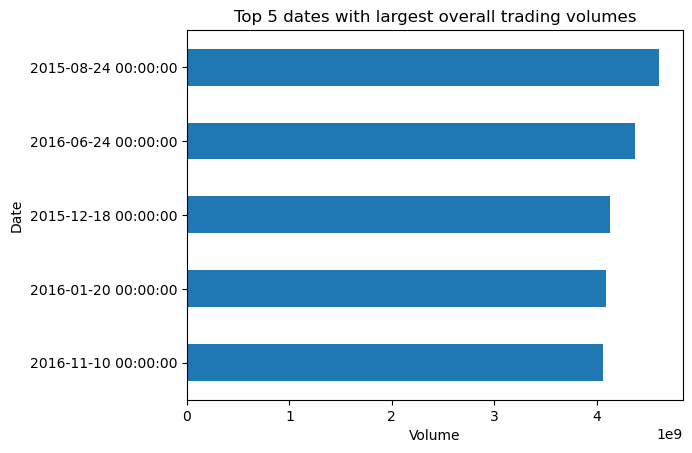

In [21]:
df.groupby('date')['volume'].sum().nlargest(5).plot(kind='barh')

# setting title and axis labels
plt.title('Top 5 dates with largest overall trading volumes')
plt.xlabel('Volume')
plt.ylabel('Date')

# inverting axis to show in descending order
plt.gca().invert_yaxis()

plt.show()

*On this date, which two stocks were traded most?*

In [22]:
df.query('date == 20150824').sort_values(by='volume', ascending=False).head(2)

,symbol,date,weekday,day,month,year,open,high,low,close,volume
201266,BAC,2015-08-24,Monday,24,August,2015,15.02,15.98,14.6,15.29,214649482
201209,AAPL,2015-08-24,Monday,24,August,2015,94.87,108.80,92.0,103.12,162206292


*On which day of the week does volume tend to be highest? Lowest?*

In [23]:
df.groupby('weekday')['volume'].sum().sort_values(ascending=False)

weekday
Wednesday    441712704743
Friday       440530701666
Thursday     431160024905
Tuesday      428297070603
Monday       374346703519
Name: volume, dtype: int64

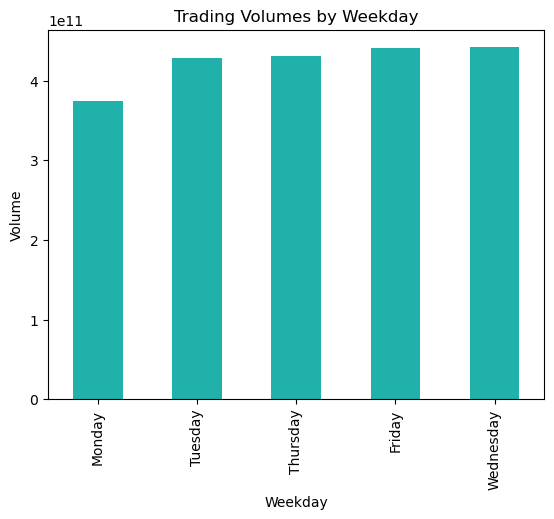

In [24]:
df.groupby('weekday')['volume'].sum().sort_values().plot(kind='bar', color='#20B2AA')

# setting title and axis labels
plt.title('Trading Volumes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Volume')

plt.show()

*On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?*

Firstly we need to create a new column for volatitilty

In [25]:
df['volatility'] = df['high'] - df['low']
df.head()

,symbol,date,weekday,day,month,year,open,high,low,close,volume,volatility
0,AAL,2014-01-02,Thursday,2,January,2014,25.0700,25.8200,25.0600,25.3600,8998943,0.7600
1,AAPL,2014-01-02,Thursday,2,January,2014,79.3828,79.5756,78.8601,79.0185,58791957,0.7155
2,AAP,2014-01-02,Thursday,2,January,2014,110.3600,111.8800,109.2900,109.7400,542711,2.5900
3,ABBV,2014-01-02,Thursday,2,January,2014,52.1200,52.3300,51.5200,51.9800,4569061,0.8100
4,ABC,2014-01-02,Thursday,2,January,2014,70.1100,70.2300,69.4800,69.8900,1148391,0.7500


Then we can analyse the volatility data for a specific company, in this case Amazon

In [26]:
df.loc[df['symbol'] == 'AMZN'].sort_values(by='volatility', ascending=False)

,symbol,date,weekday,day,month,year,open,high,low,close,volume,volatility
426023,AMZN,2017-06-09,Friday,9,June,2017,1012.50,1012.99,927.00,978.31,7647692,85.99
354027,AMZN,2016-11-10,Thursday,10,November,2016,778.81,778.83,717.70,742.38,12746994,61.13
475315,AMZN,2017-10-27,Friday,27,October,2017,1058.14,1105.58,1050.55,1100.95,16565021,55.03
190913,AMZN,2015-07-24,Friday,24,July,2015,578.99,580.57,529.35,529.42,21909381,51.22
486403,AMZN,2017-11-29,Wednesday,29,November,2017,1194.80,1194.80,1145.19,1161.27,9257512,49.61
...,...,...,...,...,...,...,...,...,...,...,...,...
149299,AMZN,2015-03-24,Tuesday,24,March,2015,373.99,375.24,372.27,374.09,2228214,2.97
121946,AMZN,2014-12-31,Wednesday,31,December,2014,311.55,312.98,310.01,310.35,2057766,2.97
110722,AMZN,2014-11-26,Wednesday,26,November,2014,333.78,334.65,331.75,333.57,1985949,2.90
50346,AMZN,2014-06-03,Tuesday,3,June,2014,305.75,307.92,305.07,307.19,2379273,2.85


## Bivariate Analysis

*Pairplot of key numerical columns*

In [27]:
key_columns = ['open', 'high', 'low', 'close', 'volume']

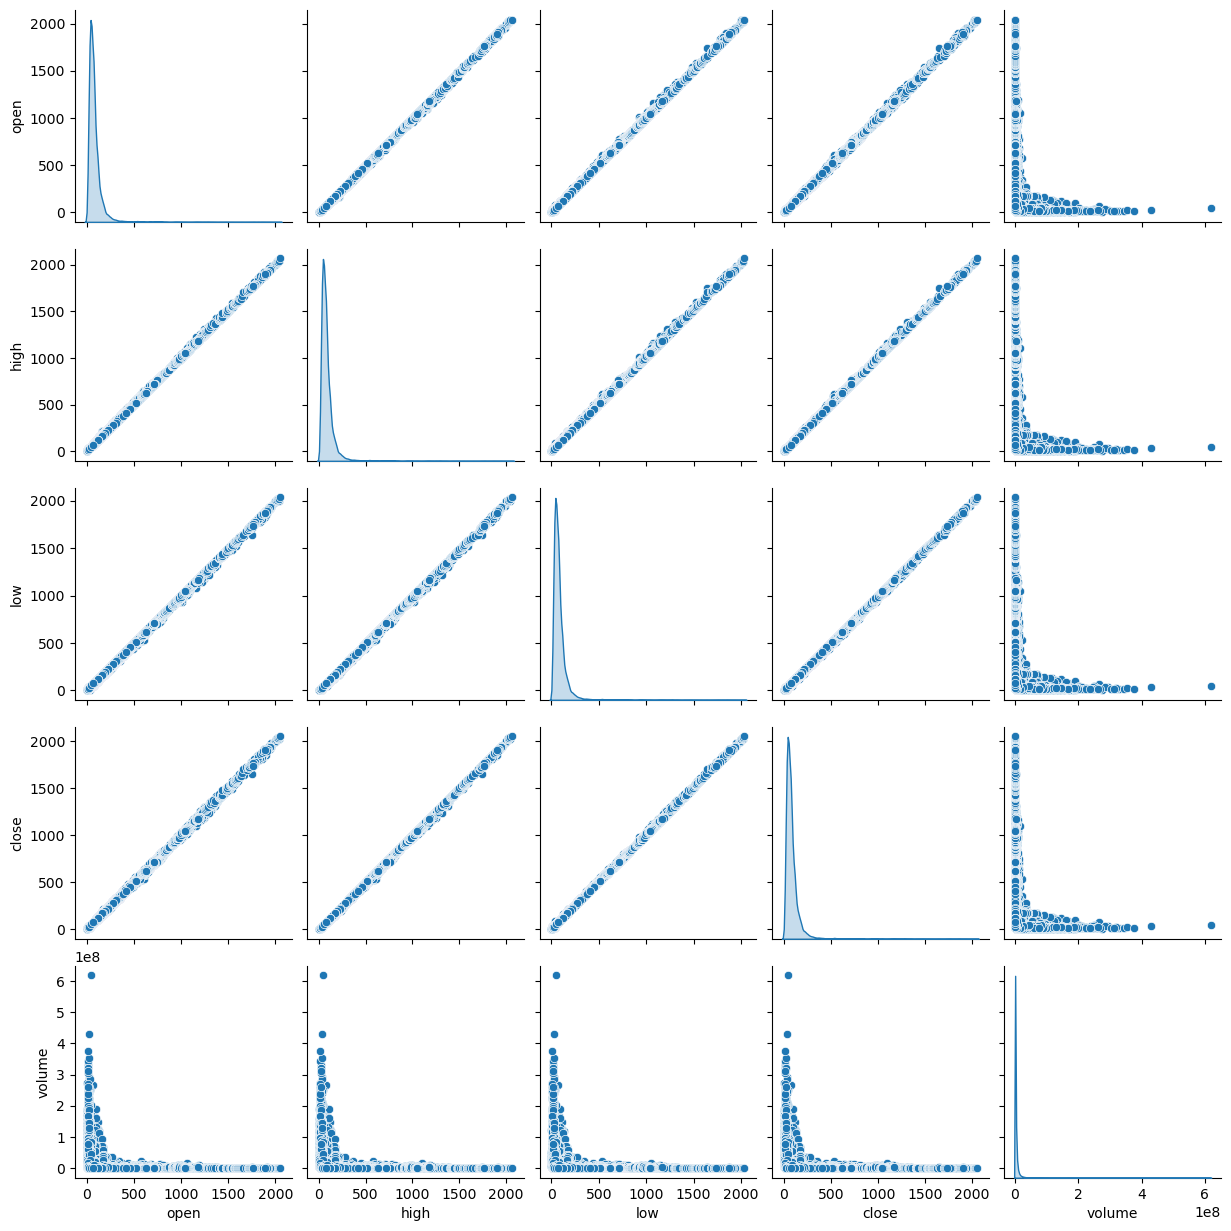

In [28]:
sns.pairplot(data = df[key_columns], diag_kind = 'kde'); # This will take a short while to run

*Correlation heatmap of key numerical columns*

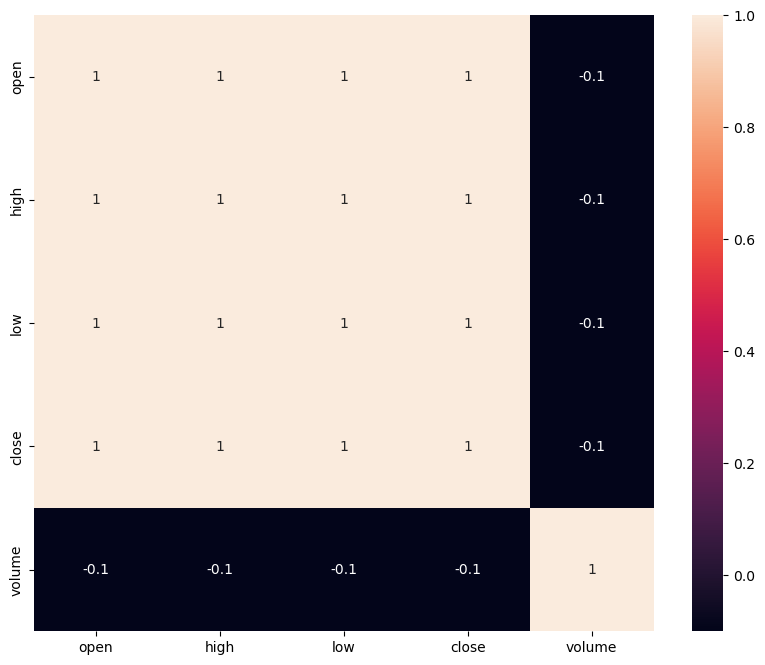

In [29]:
corr = df[key_columns].corr().round(1)

plt.figure(figsize = (10,8))

sns.heatmap(corr, annot = True);

*If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?*

In [30]:
df.sort_values(by=['symbol', 'date'])

,symbol,date,weekday,day,month,year,open,high,low,close,volume,volatility
57,A,2014-01-02,Thursday,2,January,2014,57.10,57.100,56.15,56.21,1916160,0.950
540,A,2014-01-03,Friday,3,January,2014,56.39,57.345,56.26,56.92,1866651,1.085
1023,A,2014-01-06,Monday,6,January,2014,57.40,57.700,56.56,56.64,1777472,1.140
1506,A,2014-01-07,Tuesday,7,January,2014,56.95,57.630,56.93,57.45,1463208,0.700
1989,A,2014-01-08,Wednesday,8,January,2014,57.33,58.540,57.17,58.39,2659468,1.370
...,...,...,...,...,...,...,...,...,...,...,...,...
495451,ZTS,2017-12-22,Friday,22,December,2017,72.30,72.370,71.79,71.99,1345683,0.580
495956,ZTS,2017-12-26,Tuesday,26,December,2017,72.40,72.550,71.90,72.34,792134,0.650
496461,ZTS,2017-12-27,Wednesday,27,December,2017,72.59,72.690,72.25,72.45,1159771,0.440
496966,ZTS,2017-12-28,Thursday,28,December,2017,72.49,72.600,72.14,72.39,710499,0.460


In [31]:
df.groupby('symbol')['date'].agg(['min', 'max', 'count'])

,min,max,count
symbol,,,
A,2014-01-02,2017-12-29,1007
AAL,2014-01-02,2017-12-29,1007
AAP,2014-01-02,2017-12-29,1007
AAPL,2014-01-02,2017-12-29,1007
ABBV,2014-01-02,2017-12-29,1007
...,...,...,...
XYL,2014-01-02,2017-12-29,1007
YUM,2014-01-02,2017-12-29,1007
ZBH,2014-01-02,2017-12-29,1007


Creating a pivot table for date by ticker

In [32]:
df1 = df.pivot_table(index=['date'], columns='symbol', values=['open'])
# flatten columns multi-index, `date` will become the dataframe index
df1.columns = [col[1] for col in df1.columns.values]
df1

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,57.10,25.07,110.36,79.3828,52.12,70.11,38.09,81.50,59.06,49.52,...,31.71,46.679,100.180,47.94,48.360,34.39,75.38,92.63,29.90,32.53
2014-01-03,56.39,25.75,111.23,78.9799,52.25,69.89,38.37,81.21,59.19,49.27,...,31.28,45.910,99.770,48.24,47.720,34.15,75.46,92.58,29.74,32.34
2014-01-06,57.40,26.62,113.10,76.7785,52.70,70.34,39.19,81.31,58.06,49.35,...,30.84,45.780,99.940,48.32,48.160,34.64,75.52,93.79,29.95,32.30
2014-01-07,56.95,27.20,111.98,77.7599,50.84,69.82,39.23,80.84,58.26,49.49,...,30.48,45.460,99.610,48.05,48.440,34.47,76.89,93.42,29.88,32.19
2014-01-08,57.33,26.37,112.47,76.9728,50.63,70.33,38.85,81.29,59.12,49.71,...,30.37,45.330,101.190,48.75,48.800,34.44,76.68,95.81,29.70,31.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,67.46,52.72,100.52,174.6800,98.07,92.67,57.10,155.49,173.99,88.50,...,35.15,68.330,83.815,65.35,29.705,67.58,82.69,119.90,51.50,72.30
2017-12-26,67.31,52.35,100.80,170.8000,98.15,92.48,57.01,153.14,174.36,88.28,...,35.26,67.520,83.960,65.98,29.510,67.68,82.39,120.17,51.25,72.40
2017-12-27,67.21,52.80,101.72,170.1000,97.73,93.18,57.09,153.24,174.65,88.89,...,35.22,67.740,83.990,66.36,29.420,67.74,82.34,120.00,50.78,72.59


Compute cumulative returns from opening stock prices over the entire period

In [33]:
cum_return = (df1.iloc[-1] - df1.iloc[0])
cum_return

A       10.4000
AAL     27.3500
AAP    -10.5100
AAPL    91.1372
ABBV    46.0200
         ...   
XYL     34.1400
YUM      7.2600
ZBH     29.1200
ZION    21.3800
ZTS     40.0200
Length: 505, dtype: float64

Which company provides the largest cumulative return from start date to finish date?

In [34]:
cum_return.nlargest(5)

AMZN     783.5500
PCLN     605.4700
GOOGL    497.2023
MTD      384.1100
EQIX     277.9200
dtype: float64

In [35]:
print('Amazon (AMZN) has the largest cumulative return from 2014-01-02 to 2017-12-29 with a', 
      round((df1['AMZN'][-1] / df1['AMZN'][0])*100, 2), '% rate of return', 'which is a total of $',
      cum_return['AMZN'])

Amazon (AMZN) has the largest cumulative return from 2014-01-02 to 2017-12-29 with a 296.48 % rate of return which is a total of $ 783.55


In [36]:
cum_return.nsmallest(5)

CMG     -235.75
RL       -72.81
DISCA    -67.57
RRC      -65.48
PRGO     -64.88
dtype: float64

In [37]:
print('Chipotle (CMG) has the worst cumulative return from 2014-01-02 to 2017-12-29 with a', 
      round((df1['CMG'][-1] / df1['CMG'][0])*100, 2), '% rate of return', 'which is a total of $',
      cum_return['CMG'])

Chipotle (CMG) has the worst cumulative return from 2014-01-02 to 2017-12-29 with a 55.52 % rate of return which is a total of $ -235.75


*Analysing Amazon (AMZN) stock prices over time*

In [38]:
# Creating a new dataframe for Amazon
Amazon = df.loc[df['symbol'] == 'AMZN']

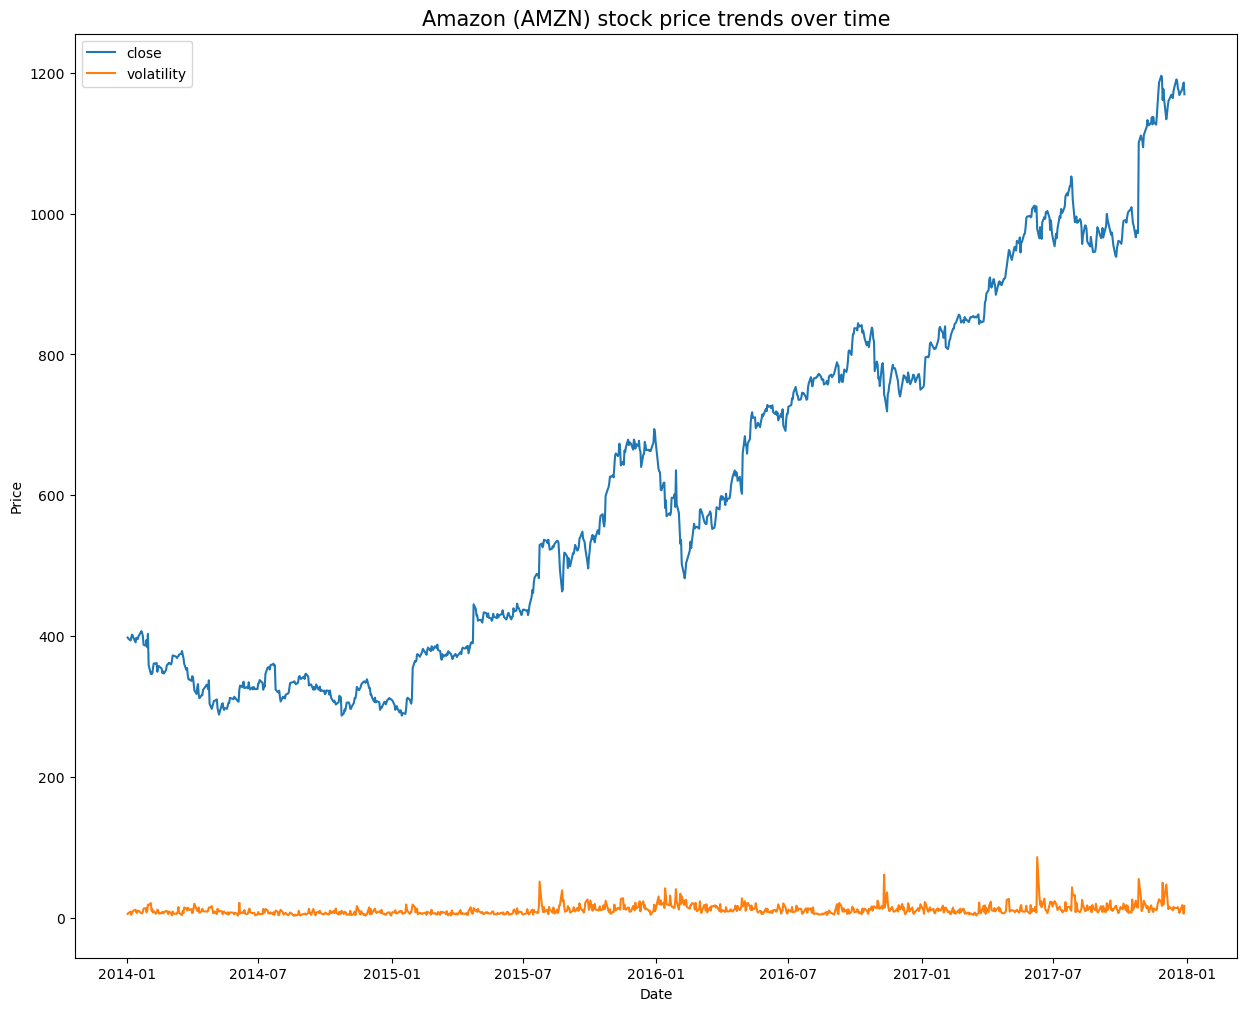

In [39]:
plt.subplots(figsize= (15,12))

sns.lineplot(data=Amazon, x='date', y='close')
sns.lineplot(data=Amazon, x='date', y='volatility')

plt.title('Amazon (AMZN) stock price trends over time', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(['close', 'volatility'])

plt.show()

*Alternatively, which stock has seen the greatest return between min and max value?*

In [40]:
df2 = df.groupby('symbol')['open'].agg(['min', 'max', 'count'])
df2

,min,max,count
symbol,,,
A,33.1800,70.50,1007
AAL,25.0700,55.89,1007
AAP,79.2000,201.24,1007
AAPL,70.7399,175.11,1007
ABBV,46.5800,98.50,1007
...,...,...,...
XYL,30.4900,69.50,1007
YUM,59.8900,94.95,1007
ZBH,88.4500,132.51,1007


In [41]:
df2['growth'] = df2['max'] - df2['min']
df2

,min,max,count,growth
symbol,,,,
A,33.1800,70.50,1007,37.3200
AAL,25.0700,55.89,1007,30.8200
AAP,79.2000,201.24,1007,122.0400
AAPL,70.7399,175.11,1007,104.3701
ABBV,46.5800,98.50,1007,51.9200
...,...,...,...,...
XYL,30.4900,69.50,1007,39.0100
YUM,59.8900,94.95,1007,35.0600
ZBH,88.4500,132.51,1007,44.0600


In [42]:
df2['growth'].nlargest(5)

symbol
PCLN     1085.57
AMZN      920.48
GOOGL     583.78
GOOG      580.55
CMG       490.35
Name: growth, dtype: float64

Finding the relevent dates for Priceline (PCLN) when stock was best to buy and sell

In [43]:
df.loc[df['symbol'] == 'PCLN'].sort_values(by='open', ascending=True)

,symbol,date,weekday,day,month,year,open,high,low,close,volume,volatility
258867,PCLN,2016-02-09,Tuesday,9,February,2016,958.43,1003.74,954.0200,991.29,1043821,49.7200
258371,PCLN,2016-02-08,Monday,8,February,2016,996.49,1000.00,954.8300,973.80,1193989,45.1700
127635,PCLN,2015-01-16,Friday,16,January,2015,997.01,1012.31,990.6906,1008.22,1004758,21.6194
259363,PCLN,2016-02-10,Wednesday,10,February,2016,1004.92,1047.99,1002.3000,1032.77,970540,45.6900
131547,PCLN,2015-01-29,Thursday,29,January,2015,1007.79,1015.51,992.1250,1014.74,760513,23.3850
...,...,...,...,...,...,...,...,...,...,...,...,...
445920,PCLN,2017-08-04,Friday,4,August,2017,2031.02,2035.47,2020.2900,2032.77,333534,15.1800
446423,PCLN,2017-08-07,Monday,7,August,2017,2034.73,2044.51,2022.0000,2042.64,402270,22.5100
442902,PCLN,2017-07-27,Thursday,27,July,2017,2040.05,2043.95,1996.0000,2025.09,487467,47.9500
444411,PCLN,2017-08-01,Tuesday,1,August,2017,2040.09,2041.49,2017.0100,2024.59,371412,24.4800


In [44]:
print('The stock offering the greatest growth in value is PCLN. Buying the stock on', 
     df.loc[df['symbol'] == 'PCLN'].sort_values(by='open', ascending=True)['date'].head(1).iloc[0].strftime('%Y-%m-%d'),
      'at value $', df.loc[df['symbol'] == 'PCLN'].sort_values(by='open', ascending=True)['open'].head(1).iloc[0],
     'and selling the stock on',
     df.loc[df['symbol'] == 'PCLN'].sort_values(by='open', ascending=False)['date'].head(1).iloc[0].strftime('%Y-%m-%d'),
     'at value $', df.loc[df['symbol'] == 'PCLN'].sort_values(by='open', ascending=False)['open'].head(1).iloc[0],
     'you can expect an overall return of $', df2['growth'].nlargest(1).iloc[0].round(2), 'per share.')

The stock offering the greatest growth in value is PCLN. Buying the stock on 2016-02-09 at value $ 958.43 and selling the stock on 2017-08-08 at value $ 2044.0 you can expect an overall return of $ 1085.57 per share.


*Analysing Priceline (PCLN) stock prices over time*

In [45]:
# Creating a new dataframe for Priceline
Priceline = df.loc[df['symbol'] == 'PCLN']

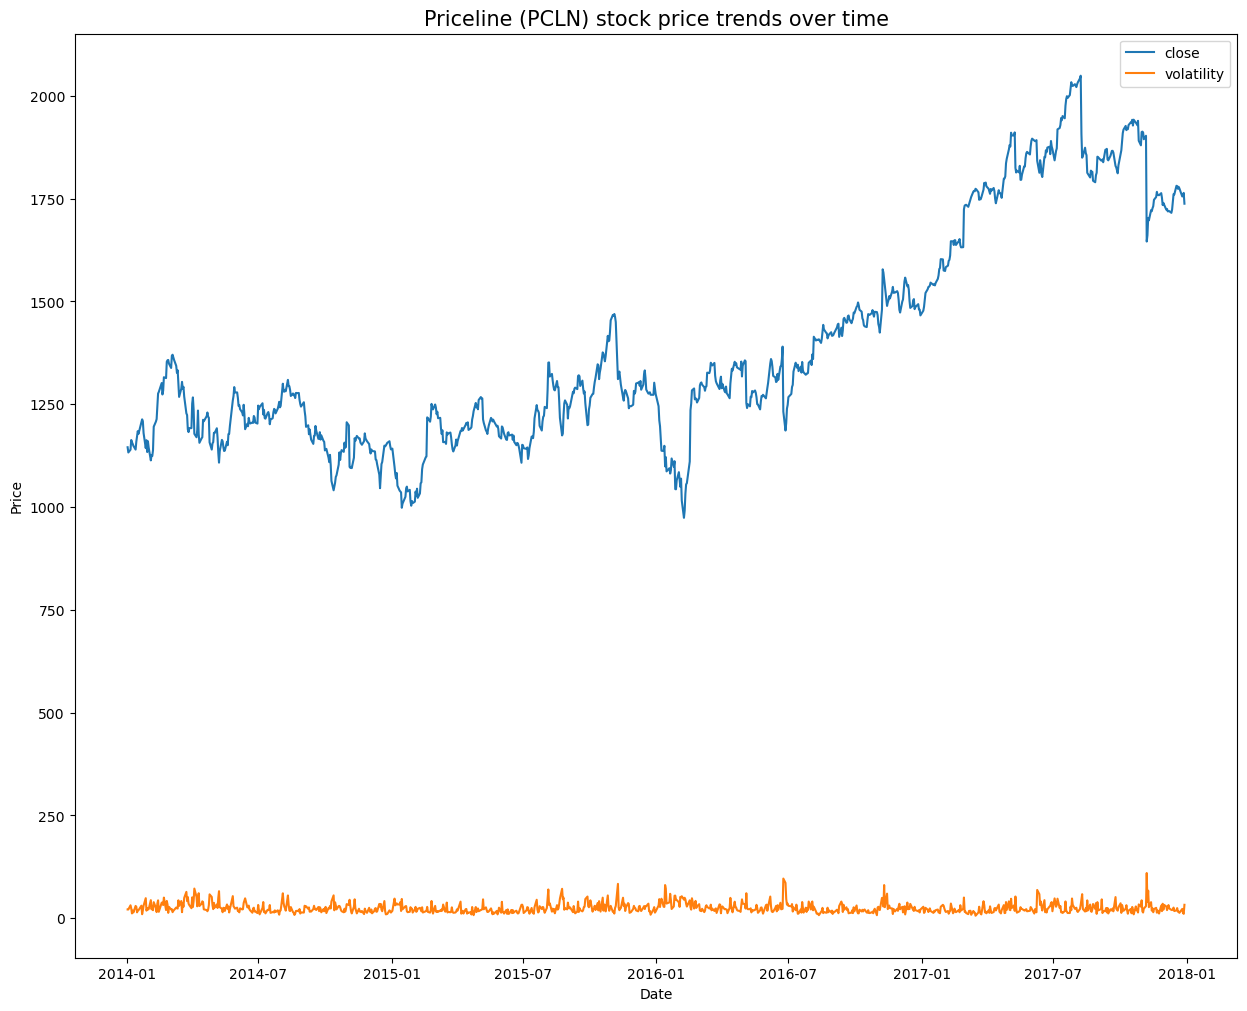

In [46]:
plt.subplots(figsize= (15,12))

sns.lineplot(data=Priceline, x='date', y='close')
sns.lineplot(data=Priceline, x='date', y='volatility')

plt.title('Priceline (PCLN) stock price trends over time', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(['close', 'volatility'])

plt.show()

# Insights and Conclusions 🕵️‍♂️

<div class="alert alert-block alert-info">
    
* The dataset has 497472 rows and 7 columns with 0 duplicated rows.
* There are a total of 11 rows containing missing values, which were dropped from the dataset as it was an insignificant amount, less than 0.01% of our overall data.
* Stock prices range over a 4 year period from Jan 2014 to Dec 2017.
* We have a total of 505 unique ticker names (S&P 500 companies) within our data.
* Monday 24th August 2015 saw the largest overall trading volume with 4,607,945,196.
* On the above date, BAC and AAPL stocks were traded most, with volumes 214,649,482 and 162,206,292 respectively.
* Wednesday tends to see the highest volume of trading. Alternatively Monday sees the least volume.
* Amazon (AMZN) has the largest cumulative return from 2014-01-02 to 2017-12-29 with a 296.48% rate of return which is a total of \\$783.55
* On Friday 2017-06-09, Amazon experienced the greatest volatility (measured by the difference between the high and low price during a single day) with a fluctuation in price of \\$85.99
* The stock offering the greatest growth in value is Priceline (PCLN). Buying the stock on 2016-02-09 at value \\$958.43 and selling the stock on 2017-08-08 at value \\$2044.0 could realise an overall return of \\$1085.57 per share.
* Chipotle (CMG) has the worst cumulative return from 2014-01-02 to 2017-12-29 with a 55.52% rate of return which is a total of negative \\$235.75
    
</div>   